<a href="https://colab.research.google.com/github/raj-kumar-one/wave2web/blob/main/wave2web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!wget https://cdn.skillenza.com/files/b5aae8a7-6690-45bd-9571-12cabe1a82da/Harangi.csv

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [ ]:
dataset= pd.read_csv("/content/Harangi.csv")

In [ ]:
dataset.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,37,Harangi,2011,1,1/1/2011,3.74,2835.90,142.0,0.0,HARANGI-2011-01-01
1,38,Harangi,2011,1,1/2/2011,3.76,2836.09,239.0,0.0,HARANGI-2011-01-02
2,39,Harangi,2011,1,1/3/2011,3.77,2836.22,166.0,0.0,HARANGI-2011-01-03
3,40,Harangi,2011,1,1/4/2011,3.78,2836.31,118.0,0.0,HARANGI-2011-01-04
4,41,Harangi,2011,1,1/5/2011,3.79,2836.41,130.0,0.0,HARANGI-2011-01-05


In [ ]:
dataset.describe()

,SL_NO,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS
count,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000,3321.000000
mean,22260.781391,2015.726287,27.664559,4.065110,2829.362978,1287.079461,1275.559700
std,12776.309856,2.827479,14.935104,2.589443,22.780068,3099.177200,2984.959034
min,37.000000,2010.000000,1.000000,0.320000,2773.830000,3.000000,0.000000
25%,11031.000000,2014.000000,15.000000,1.740000,2808.500000,67.000000,0.000000
50%,22562.000000,2016.000000,28.000000,3.430000,2831.920000,161.000000,80.000000
75%,33349.000000,2018.000000,41.000000,6.830000,2854.070000,1162.000000,1571.000000
max,43905.000000,2020.000000,52.000000,8.500000,2859.000000,77900.000000,78589.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SL_NO                3321 non-null   int64  
 1   RESERVOIR            3321 non-null   object 
 2   YEAR                 3321 non-null   int64  
 3   WEEK_NO              3321 non-null   int64  
 4   FLOW_DATE            3321 non-null   object 
 5   PRESENT_STORAGE_TMC  3321 non-null   float64
 6   RES_LEVEL_FT         3321 non-null   float64
 7   INFLOW_CUSECS        3321 non-null   float64
 8   OUTFLOW_CUECS        3321 non-null   float64
 9   UNIQUE_KEY           3321 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 259.6+ KB


In [ ]:
#dataset=dataset.where(dataset['RES_LEVEL_FT']!='&nbsp;')
#dataset=dataset.where(dataset['INFLOW_CUSECS']!='&nbsp;')
#dataset=dataset.where(dataset['OUTFLOW_CUECS']!="") 
#dataset=dataset.dropna()

In [ ]:
dataset['RES_LEVEL_FT']=dataset['RES_LEVEL_FT'].astype(float)
dataset['INFLOW_CUSECS']=dataset['INFLOW_CUSECS'].astype(float)
dataset['OUTFLOW_CUECS']=dataset['OUTFLOW_CUECS'].astype(float)

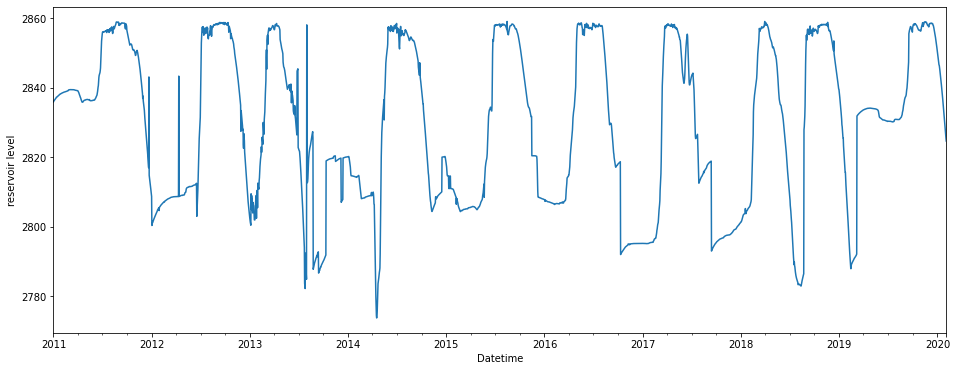

In [ ]:
ts1 = pd.Series(dataset['RES_LEVEL_FT'].to_numpy(), index=pd.date_range("1/1/2011", periods=3321))

f = plt.figure()
plt.xlabel('Datetime')
plt.ylabel('reservoir level')
f.set_figwidth(16)
f.set_figheight(6)

ts1.plot();


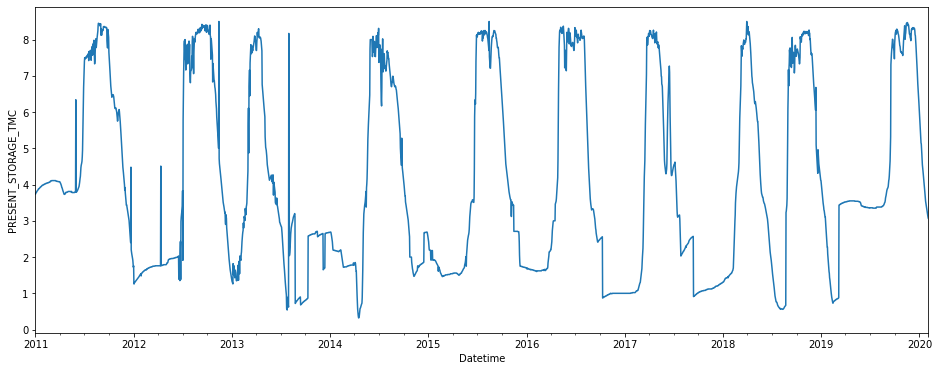

In [ ]:
ts2= pd.Series(dataset['PRESENT_STORAGE_TMC'].to_numpy(), index=pd.date_range("1/1/2011", periods=3321))
f = plt.figure()
plt.xlabel('Datetime')
plt.ylabel('PRESENT_STORAGE_TMC')
f.set_figwidth(16)
f.set_figheight(6)

ts2.plot();

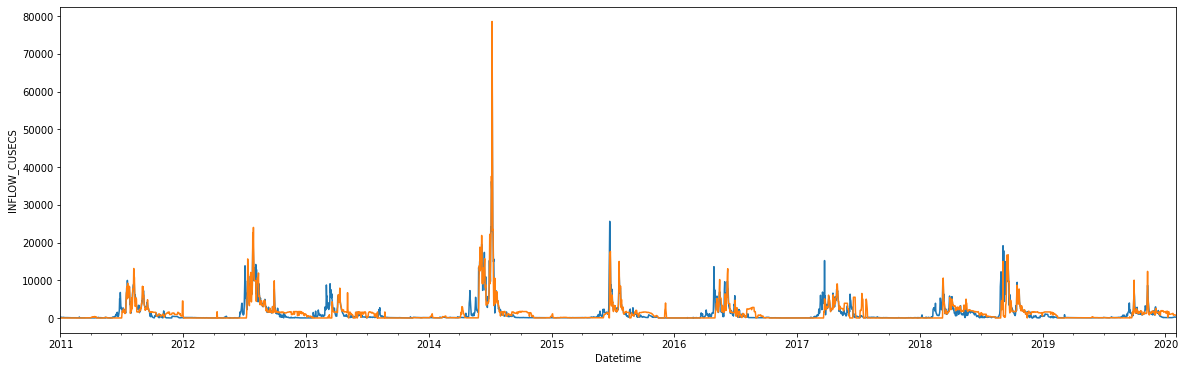

In [ ]:
ts31= pd.Series(dataset['INFLOW_CUSECS'].to_numpy(), index=pd.date_range("1/1/2011", periods=3321))
ts32= pd.Series(dataset['OUTFLOW_CUECS'].to_numpy(), index=pd.date_range("1/1/2011", periods=3321))
f = plt.figure()
plt.xlabel('Datetime')
plt.ylabel('INFLOW_CUSECS')
f.set_figwidth(20)
f.set_figheight(6)

ts31.plot()
ts32.plot()

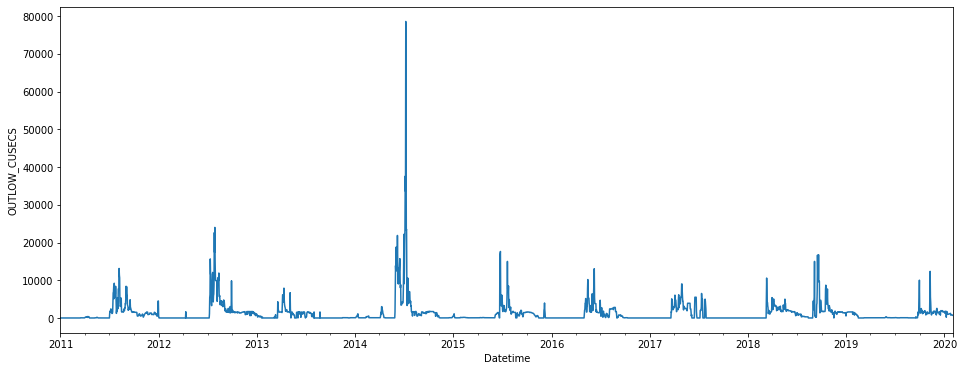

In [ ]:
ts4= pd.Series(dataset['OUTFLOW_CUECS'].to_numpy(), index=pd.date_range("1/1/2011", periods=3321))
f = plt.figure()
plt.xlabel('Datetime')
plt.ylabel('OUTLOW_CUSECS')
f.set_figwidth(16)
f.set_figheight(6)

ts4.plot();

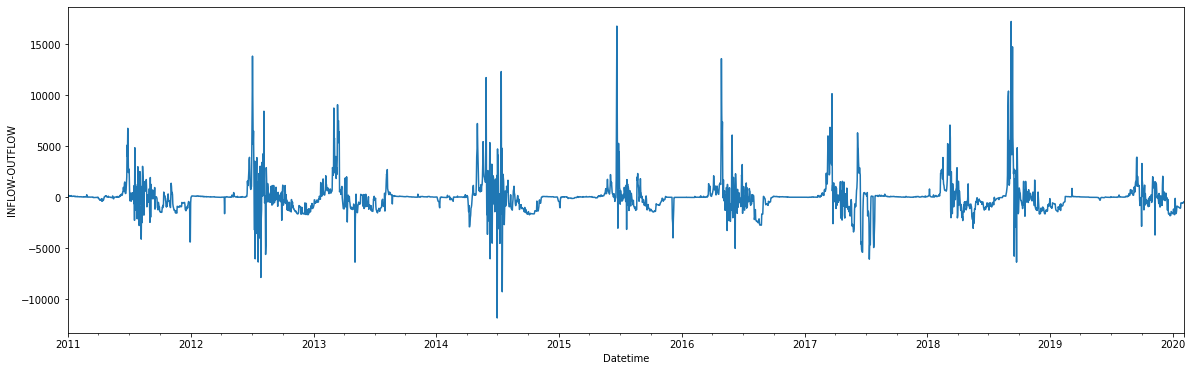

In [ ]:
ts5= pd.Series((dataset['INFLOW_CUSECS']-dataset['OUTFLOW_CUECS']).to_numpy(), index=pd.date_range("1/1/2011", periods=3321))
f = plt.figure()
plt.xlabel('Datetime')
plt.ylabel('INFLOW-OUTFLOW')
f.set_figwidth(20)
f.set_figheight(6)

ts5.plot();

In [ ]:
dataset['FLOW_DATE']=pd.to_datetime(dataset['FLOW_DATE'])

In [ ]:
df = {'RES_LEVEL_FT' : pd.Series(list(dataset['RES_LEVEL_FT']),index =dataset['FLOW_DATE'])}

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.head()

,RES_LEVEL_FT
FLOW_DATE,
2011-01-01,2835.90
2011-01-02,2836.09
2011-01-03,2836.22
2011-01-04,2836.31
2011-01-05,2836.41


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

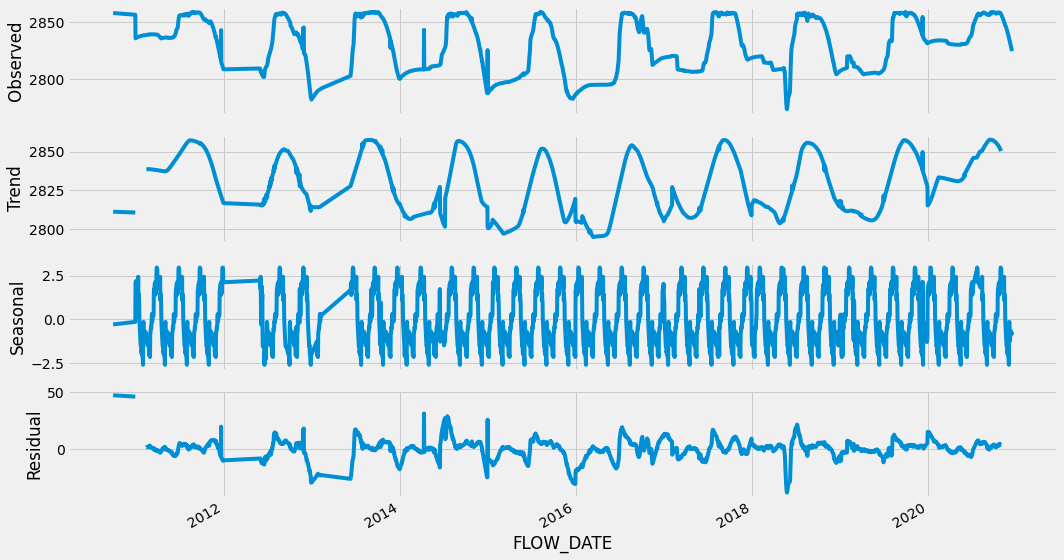

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['RES_LEVEL_FT'], freq=91)

# Plot decomposition
decomp.plot();
plt.tight_layout();

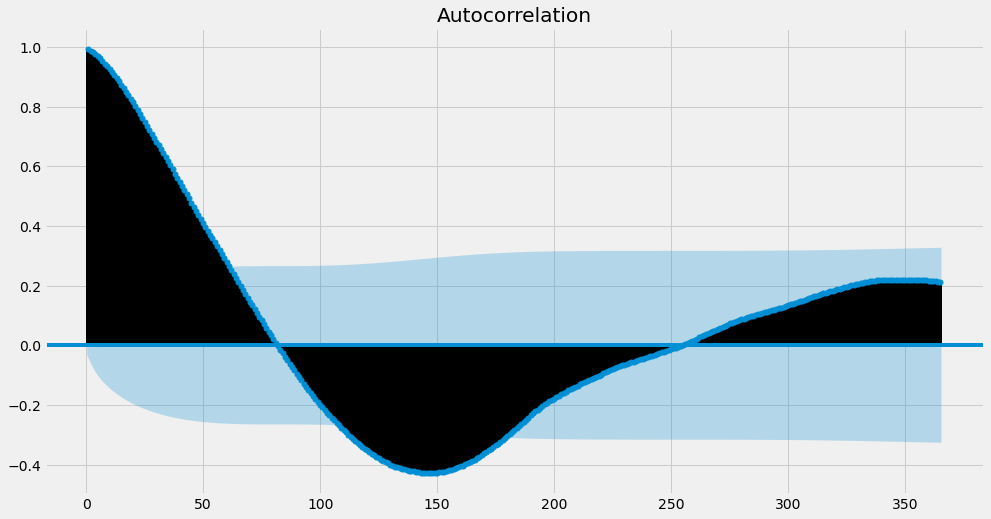

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(df['RES_LEVEL_FT'], lags=365, zero=False, ax=ax1);

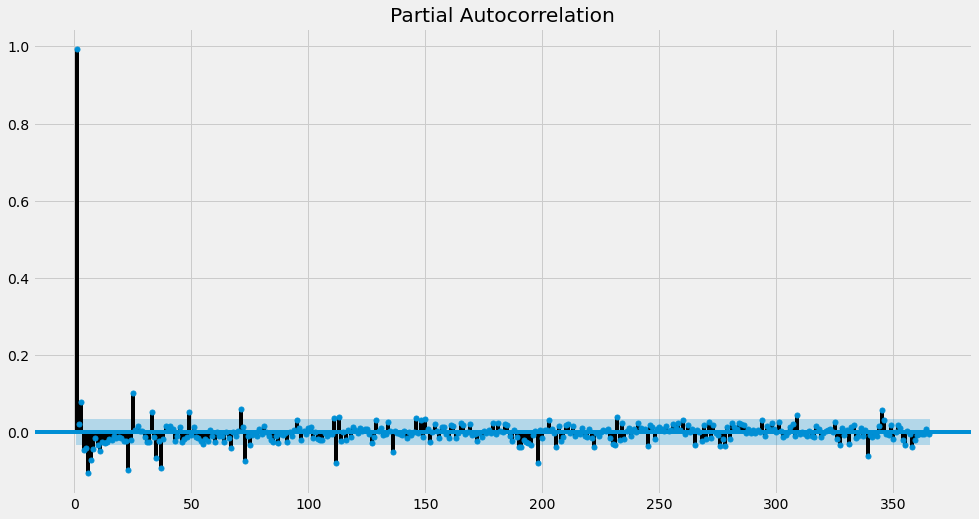

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_pacf(df['RES_LEVEL_FT'], lags=365, zero=False, ax=ax1);